# <font color='#31394d'>Linear Regression Practice Exercises</font>


For this exercise, we'll be using the carseats dataset that is provided as a csv file in the `data` folder.

We will attempt to predict child car seat sales (the `Sales` variable) based on a number of predictors using data from 400 different locations. The dataset includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location; that is, the space within each store in which the car seat is displayed. The predictor `Shelveloc` takes on three possible values: Bad, Medium, and Good. `US` and `Urban` are also categorical (binary) features.

🚀 <font color='#d9c4b1'> Exercise: </font> Import and examine the data. Don't forget to import the necessary packages!

In [9]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('carseats.csv')
data.head()
data.tail()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


Now let's do some basic exploratory data analysis.

🚀 <font color='#d9c4b1'> Exercise: </font> Determine which columns are numerical and examine their distributions. Look for outliers. Can you see any strong relationships, particularly with the `Sales` outcome?

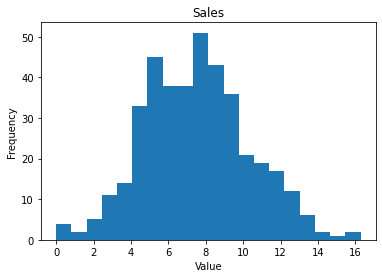

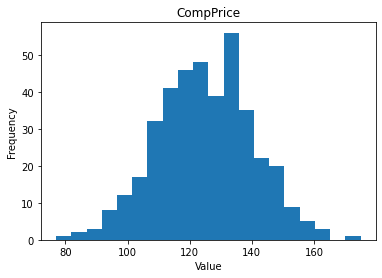

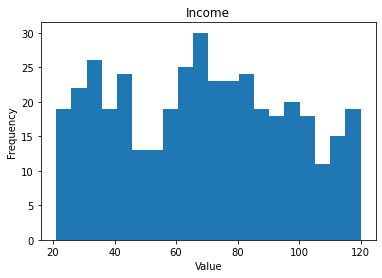

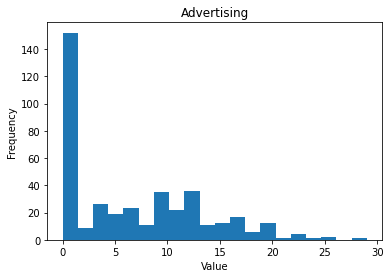

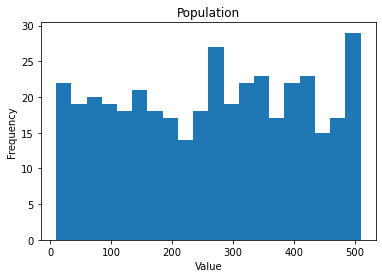

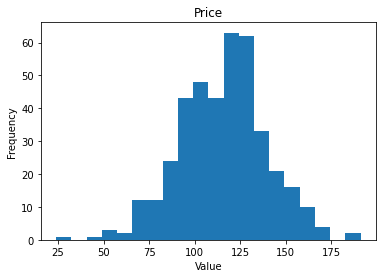

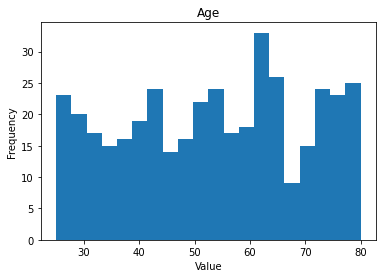

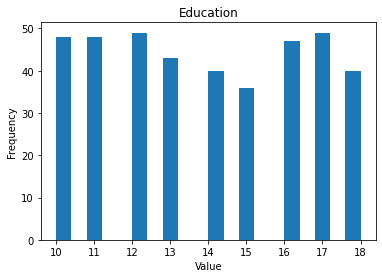

In [3]:
numerical_columns = data.select_dtypes(include='number').columns
for col in numerical_columns:
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    

🚀 <font color='#d9c4b1'> Exercise: </font> For the categorical variables, check how many observations are in each category. How does carseat sales vary by category?

In [4]:
# your code goes here

# List of categorical variables
cat_vars = ['ShelveLoc', 'Urban', 'US']

# Loop through the categorical variables
for cat_var in cat_vars:
    # Print the number of observations in each category
    cat_counts = data[cat_var].value_counts()
    print(f"{cat_var} counts:\n{cat_counts}\n")
    
    # Print the mean sales for each category
    sales_by_cat = data.groupby(cat_var)['Sales'].mean()
    print(f"Sales by {cat_var}:\n{sales_by_cat}\n")



ShelveLoc counts:
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

Sales by ShelveLoc:
ShelveLoc
Bad        5.522917
Good      10.214000
Medium     7.306575
Name: Sales, dtype: float64

Urban counts:
Yes    282
No     118
Name: Urban, dtype: int64

Sales by Urban:
Urban
No     7.563559
Yes    7.468191
Name: Sales, dtype: float64

US counts:
Yes    258
No     142
Name: US, dtype: int64

Sales by US:
US
No     6.823028
Yes    7.866899
Name: Sales, dtype: float64



To get ready to fit a linear regression model, we must first use one-hot encoding to convert our categorical variables into dummies. Read more about one-hot encoding here! https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

🚀 <font color='#d9c4b1'> Exercise: </font> Use the `pd.get_dummies` function to do this. If you don't know how to use this function, try looking at its help page with `?pd.get_dummies`. Don't forget to choose a reference category and omit this column from the dataset.

In [5]:
# Define the categorical variables to be one-hot encoded
cat_vars = ['ShelveLoc', 'Urban', 'US']

# One-hot encode the categorical variables
dummy_vars = pd.get_dummies(data[cat_vars], drop_first=True)

# Add the dummy variables back to the original dataframe
data = pd.concat([data, dummy_vars], axis=1)

# Remove the original categorical variables
data = data.drop(cat_vars, axis=1)


In [6]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

Great - all the columns are now numerical! We are ready to fit our first linear regression model.

Begin by importing the `LinearRegression` class. Inspect the help to see what parameters can be set when we instantiate an object of this class and what the default arguments are:

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
?model

Like all supervised learning methods in `sklearn`, the `model` object has a `fit` method for estimating the model parameters (using the training data) and a `predict` method for making predictions on new data (the test data).

🚀 <font color='#d9c4b1'> Exercise: </font> Train a linear model to predict `Sales` using all the other columns in this dataset; that is, estimate the $\beta$ parameters by minimising the RSS loss function on the training data. If you are not sure how to do this, try examining `?model.fit`.

In [12]:
# your code goes here
# Define the predictor and target variables
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the intercept and coefficients of the model
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 5.769268085848798
Coefficients: [ 9.20887431e-02  1.54156888e-02  1.29286122e-01  3.62422274e-04
 -9.41959216e-02 -4.50022751e-02 -3.14700275e-02  4.99166570e+00
  2.02588979e+00  1.51422228e-02 -2.98032055e-01]


🚀 <font color='#d9c4b1'> Exercise: </font> Interpret your regression coefficients. Do these correspond to the relationships that you discovered in your exploratory data analysis above?

In [13]:
# your code goes here
# Print the coefficient interpretation
print(f"Intercept: {model.intercept_}")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")


Intercept: 5.769268085848798
CompPrice: 0.0921
Income: 0.0154
Advertising: 0.1293
Population: 0.0004
Price: -0.0942
Age: -0.0450
Education: -0.0315
ShelveLoc_Good: 4.9917
ShelveLoc_Medium: 2.0259
Urban_Yes: 0.0151
US_Yes: -0.2980


🚀 <font color='#d9c4b1'> Exercise: </font> Plot the actual sales versus the predicted sales. Compute the coefficient of determination ($R^2$). Does this seem like a good model?

R2: 0.8541210430410675


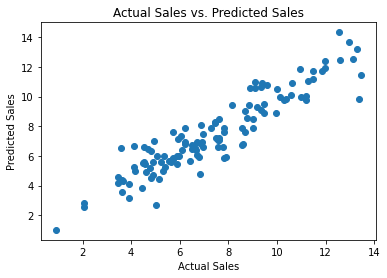

In [15]:
# your code goes here
from sklearn.metrics import r2_score

# predict sales using the test data
y_predicted = model.predict(X_test)

# plot actual sales versus predicted sales
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales')

# compute R2
r2 = r2_score(y_test, y_predicted)
print('R2:', r2)


From our exploratory data analysis, we saw that only price and shelf location seem to be strongly associated with sales. All these other features might be making our model unnecessarily complex and harder to productionize.

🚀 <font color='#d9c4b1'> Exercise: </font> Use cross-validation to determine which model is best: the full model above or a simpler model that only includes price and shelf location as features.

In [16]:
# your code goes here
from sklearn.model_selection import cross_val_score

# create a new feature matrix with only price and shelf location
X_simple = X[['Price', 'ShelveLoc_Good', 'ShelveLoc_Medium']]

# create a new linear regression model using only the simple features
new_model = LinearRegression()

# compute the cross-validated R2 for the full model
cv_scores_full = cross_val_score(model, X, y, cv=5, scoring='r2')
print('Full model CV R2:', cv_scores_full.mean())

# compute the cross-validated R2 for the simple model
cv_scores_simple = cross_val_score(new_model, X_simple, y, cv=5, scoring='r2')
print('New model CV R2:', cv_scores_simple.mean())

Full model CV R2: 0.8597391563449067
New model CV R2: 0.5288743550535


Let's try and improve on our simple model...

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you think that the relationship between sales and price is likely to differ depending on the shelf location. Add an interation effect to your simple model and see if it improves on model performance.

In [25]:
# your code goes here
# create model with interaction effect
X_train['Price_ShelveLoc_Medium'] = X_train['Price'] * X_train['ShelveLoc_Medium']
X_test['Price_ShelveLoc_Medium'] = X_test['Price'] * X_test['ShelveLoc_Medium']
model = LinearRegression().fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

# calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.8539003935333387


🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you suspect that there is a quadratic relationship between sales and price. (The exploratory analysis doesn't actually support this, but let's go ahead anyway!) Extend your simple model to include an quadratic term for price and determine if it improves model performance.

In [22]:
# your code goes here
# create new feature for squared price
X_train['Price_sq'] = X_train['Price']**2
X_test['Price_sq'] = X_test['Price']**2

# fit linear model with quadratic term for price
model_quad = LinearRegression()
model_quad.fit(X_train[['Price', 'Price_sq', 'ShelveLoc_Good', 'ShelveLoc_Medium']], y_train)

# evaluate model performance
print('R^2 score:', model_quad.score(X_test[['Price', 'Price_sq', 'ShelveLoc_Good', 'ShelveLoc_Medium']], y_test))


R^2 score: 0.5053915967689104
